In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [2]:
output_dir = '/mnt/data'
image_set = 'test_attr'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [3]:
dir(coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [44]:
len(coco.imgs)
print(coco.cats)

{1: {'supercategory': 'blouse', 'id': 1, 'name': 'blouse', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'top_hem_left', 'top_hem_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 1], [6, 9], [6, 3], [6, 2], [9, 13], [9, 12]]}, 2: {'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [1, 15], [2, 15], [2, 3], [2, 6], [3, 6], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [6, 11], [7, 8], [7, 10], [8, 9], [9, 10], [9, 11], [10, 11], [11, 14], [11, 15], [11, 12], [12, 13], [13, 14]

In [40]:
result_path = '/mnt/data/outputs/detections_test_attr_results-v1.json'
Path(result_path).exists()
detections = json.load(Path(result_path).open())

d1 = detections[0]
d1
len(detections)

243455

In [20]:
img_anno = coco.loadImgs(d1['image_id'])[0]
img_anno

{'file_name': 'Images/collar_design_labels/4d8a38b29930a403e5e2167c6e2327b5.jpg',
 'height': 512,
 'id': 13191215415537611567,
 'width': 554}

In [7]:
output_dir = '/mnt/data'
image_set = 'test_attr'
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
img_path.exists()

True

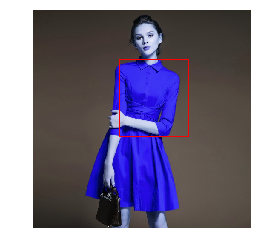

In [11]:
xmin, ymin, width, height = [ int(x) for x in d1['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()

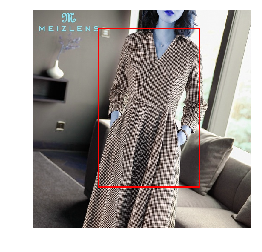

{'bbox': [153.90414214306452, 43.75407858247845, 238.4186382325462, 372.8772029176546], 'category_id': 1, 'image_id': 17095286058477658705, 'score': 0.03274381905794144}


In [50]:
det = detections[555]
img_anno = coco.loadImgs(det['image_id'])[0]
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
xmin, ymin, width, height = [ int(x) for x in det['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()
print(det)

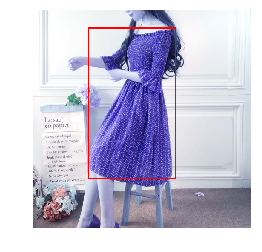

{'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [1, 15], [2, 15], [2, 3], [2, 6], [3, 6], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [6, 11], [7, 8], [7, 10], [8, 9], [9, 10], [9, 11], [10, 11], [11, 14], [11, 15], [11, 12], [12, 13], [13, 14], [14, 15]]}


In [56]:
det = detections[111111]
img_anno = coco.loadImgs(det['image_id'])[0]
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
xmin, ymin, width, height = [ int(x) for x in det['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()
print(coco.cats[det['category_id']])

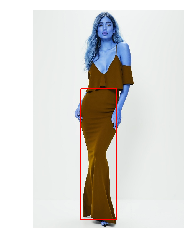

{'supercategory': 'trousers', 'id': 5, 'name': 'trousers', 'keypoints': ['waistband_left', 'waistband_right', 'bottom_right_out', 'bottom_right_in', 'crotch', 'bottom_left_in', 'bottom_left_out'], 'skeleton': [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 1], [5, 1], [5, 2]]}


In [57]:
det = detections[222222]
img_anno = coco.loadImgs(det['image_id'])[0]
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
xmin, ymin, width, height = [ int(x) for x in det['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()
print(coco.cats[det['category_id']])

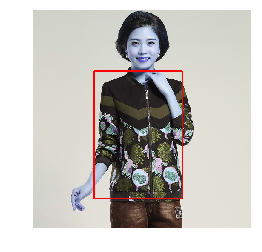

{'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [1, 15], [2, 15], [2, 3], [2, 6], [3, 6], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [6, 11], [7, 8], [7, 10], [8, 9], [9, 10], [9, 11], [10, 11], [11, 14], [11, 15], [11, 12], [12, 13], [13, 14], [14, 15]]}


In [60]:
det = detections[56678]
img_anno = coco.loadImgs(det['image_id'])[0]
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
xmin, ymin, width, height = [ int(x) for x in det['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()
print(coco.cats[det['category_id']])